In [2]:
%matplotlib inline

from keras.datasets import reuters

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()])
decoded_newwire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print decoded_newwire

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [8]:
train_labels[0]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels),dimension))
#     for i, label in enumerate(labels):
#         results[i,label] = 1
#     return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 245us/step - loss: 2.5317 - acc: 0.4957 - val_loss: 1.7206 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.4451 - acc: 0.6878 - val_loss: 1.3454 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 202us/step - loss: 1.0950 - acc: 0.7652 - val_loss: 1.1712 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.8696 - acc: 0.8160 - val_loss: 1.0822 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.7032 - acc: 0.8475 - val_loss: 0.9849 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.5667 - acc: 0.8796 - val_loss: 0.9424 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.4583 - acc: 0.9052 - val_loss: 0.9083 - val_acc: 0.8010


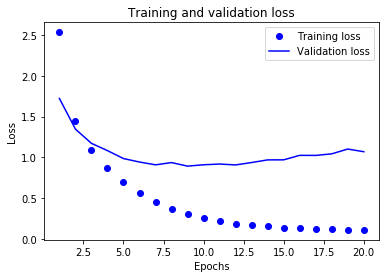

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

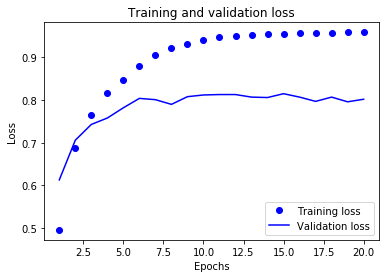

In [15]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results=model.evaluate(x_test, one_hot_test_labels)
print results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 191us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.3711 - acc: 0.7119 - val_loss: 1.2757 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.0135 - acc: 0.7789 - val_loss: 1.1299 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.7975 - acc: 0.8251 - val_loss: 1.0531 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.6391 - acc: 0.8627 - val_loss: 0.9753 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.5121 - acc: 0.8920 - val_loss: 0.9096 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.4120 - acc: 0.9144 - val_loss: 0.8909 - val_acc: 0.8210
Epoch 8

In [17]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [18]:
predictions = model.predict(x_test)


In [19]:
predictions[0].shape

(46,)

In [20]:
np.sum(predictions[0])

1.0

In [21]:
np.argmax(predictions[0])

3